# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [2]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

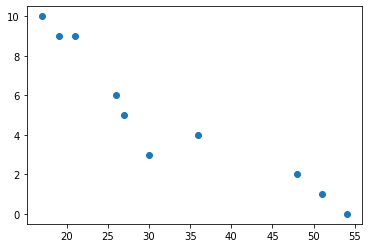

In [3]:
# Your code here.
x = student_data[['Age']]
y = student_data[['Tardies']]
plt.scatter(x,y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# It clearly shows that the older the students are, the later they tend to be. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
display(student_data.corr())
# This help us understand the linear relation between them. 
# For this case, the correlation between Age & Tardies seems to be very negatively strong. 

#covariance:
display(student_data.cov())
# This help us understand how much impact does a variable creates in the other. 
# For this case, the covariance between Age & Tradies follows the same pattern of the scatter plot. 

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
model = linear_model.LinearRegression() #Linear Regression
result = model.fit(x,y) #The outcome variable would be tardies.

display("Intercept: ",result.intercept_[0])
display("Coef: ",result.coef_[0][0])

'Intercept: '

12.888803363135771

'Coef: '

-0.2428207709159809

Plot your regression model on your scatter plot.

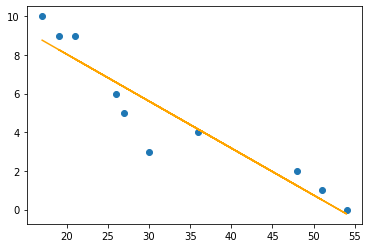

In [7]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

'Model score: '

0.8820265558250109

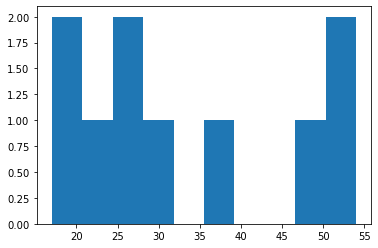

In [8]:
# Your response here. 
display('Model score: ',result.score(x,y)) 
# Based on the coef of determination, we have a good result of our model. This is telling us that the younger students are more likely to be late than the older ones.
# There are very little cases that could be consider outliers for this case (e.g 30 years old with 3 tardies).
# Considering the fact that most of the dataset distribution is between 20-30 years range, the model creates a good simulation of how Age affects the amount of tardies.   

plt.hist(student_data['Age'])
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

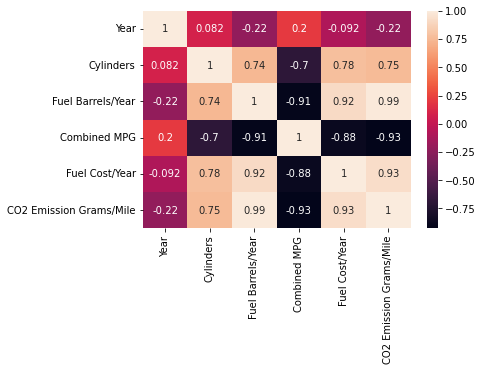

In [32]:
# Your response here. 
X = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = vehicles[['CO2 Emission Grams/Mile']]

X_corr = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
#display(X_corr.corr())
sns.heatmap(X_corr.corr(),annot=True, xticklabels = X_corr.corr().columns,yticklabels = X_corr.corr().columns)


In [27]:
#From more to less correlated
# - Fuel Bareers/Year and CO2 Emissions (Fuel Cost/Year is not considered because of its strong correlation with this one)
# - Combined MPG and CO2 Emissions 
# - Cylinders and CO2 Emissions 
# - Year and CO2 Emissions

# Fuel Bareers/Year could be the most useful variable for that outcome. 
# On the other hand, the year has no strong relation with CO2 Emissions. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [28]:
# Your response here. 
model = linear_model.LinearRegression() #Multilinear Regression
result = model.fit(X,y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
# Your response here. 
display('Model score: ',result.score(X,y))
#display(result.summary())
# The most important variables for the model are Fuel Barrels/Year and Combined MPG, the impact of both of them combined is almost the overall score of all of the variables combined.
# By doing some extra tests, we could see that comparing the most correlated and less correlated variables provides more or less final score of the model. 
# Check tests below! 

'Model score: '

0.9808734920269122

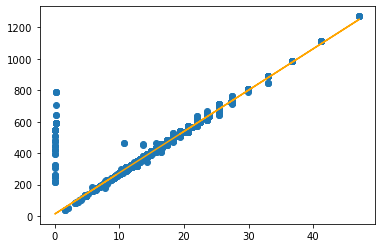

'Model score of only Fuel Barrels: '

0.9725680773391494

In [46]:
# Validation tests

x_vehicles = vehicles[['Fuel Barrels/Year']]
y_vehicles = vehicles[['CO2 Emission Grams/Mile']]
regression_line = result.intercept_ + result.coef_[0]*x_vehicles
plt.plot(x_vehicles, regression_line, c = 'orange')
plt.scatter(x_vehicles,y_vehicles)
plt.show()

model = linear_model.LinearRegression() #Linear Regression
result = model.fit(x_vehicles,y_vehicles)
display('Model score of only Fuel Barrels: ',result.score(x_vehicles,y_vehicles))

In [53]:
# Validation tests with top correlated 1

X_test_multi_2 = vehicles[['Combined MPG','Fuel Barrels/Year']]
y_test_multi_2 = vehicles[['CO2 Emission Grams/Mile']]
model = linear_model.LinearRegression() #Multilinear Regression
result = model.fit(X_test_multi_2,y_test_multi_2)
display('Model score of Combined MPG & Fuel Barrels: ',result.score(X_test_multi_2,y_test_multi_2))

'Model score of Combined MPG & Fuel Barrels: '

0.9774643819635159

In [54]:
# Validation tests with top correlated 2

X_test_multi = vehicles[['Cylinders','Fuel Barrels/Year']]
y_test_multi = vehicles[['CO2 Emission Grams/Mile']]
model = linear_model.LinearRegression() #Multilinear Regression
result = model.fit(X_test_multi,y_test_multi)
display('Model score of Cylinders & Fuel Barrels: ',result.score(X_test_multi,y_test_multi))

'Model score of Cylinders & Fuel Barrels: '

0.9737445898885942

In [55]:
# Validation tests with less correlated 3

X_test_multi_3 = vehicles[['Year','Fuel Barrels/Year']]
y_test_multi_3 = vehicles[['CO2 Emission Grams/Mile']]
model = linear_model.LinearRegression() #Multilinear Regression
result = model.fit(X_test_multi_3,y_test_multi_3)
display('Model score of Year & Fuel Barrels: ',result.score(X_test_multi_3,y_test_multi_3))

'Model score of Year & Fuel Barrels: '

0.9725872381508862

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [59]:
# Your code here.
parties_data = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
parties_data

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

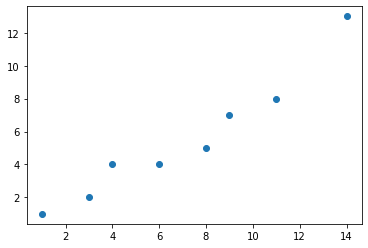

In [60]:
# Your code here.
x = parties_data[['Invited']]
y = parties_data[['Attended']]
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

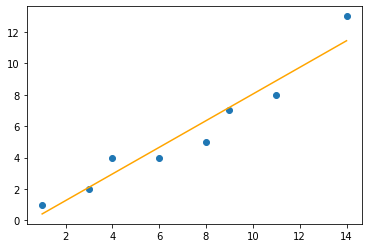

In [61]:
# Your response here. 
model = linear_model.LinearRegression() 
result = model.fit(x,y) 

regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

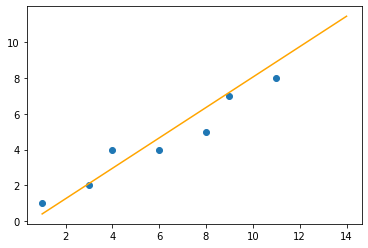

In [62]:
# Your response here. 
parties_data_new = pd.DataFrame({'Invited': [1,3,4,6,8,9,11], 'Attended': [1,2,4,4,5,7,8]})
model = linear_model.LinearRegression() 
result1 = model.fit(x,y) 
regression_line = result1.intercept_ + result1.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
x1 = parties_data_new[['Invited']]
y1 = parties_data_new[['Attended']]
plt.scatter(x1,y1)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [63]:
# Your response here. 
display("Intercept case 1: ",result.intercept_)
display("Intercept case 2 with removed outliers: ",result1.intercept_)
display("Coef per each case - case 1: ",result.coef_)
display("Coef per each case - case 2 with removed outliers: ",result1.coef_)
display('Model score case 1: ',result.score(x,y))
display('Model score case 2 with removed outliers: ',result1.score(x1,y1))

#The only thing that is showing any changes is the coef determination, where the value decrease from 0.931 to 0.879

'Intercept case 1: '

array([-0.43939394])

'Intercept case 2 with removed outliers: '

array([-0.43939394])

'Coef per each case - case 1: '

array([[0.84848485]])

'Coef per each case - case 2 with removed outliers: '

array([[0.84848485]])

'Model score case 1: '

0.9316696375519905

'Model score case 2 with removed outliers: '

0.8797748490413781